# **Import Libraries** 

I am going to sort my saved songs on Spotify by various clusters that are going to be derived due to KMeans clustering model, which was trained with Spotify Dataset 1921-2020 found on Kaggle.Spotify Dataset 1921-2020 contains more than 160 000 songs that were released in the period of 1921-2020. Aditionally, all the clusters derived will represent a certain mood I have while listening to them. Furthermore, I am going to get my Spotify recommendations and classify them as well. 
Get started:https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks

In [63]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util #import libs

import pandas as pd
import torch
import numpy as np

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing the dataset

In [57]:
df_all=pd.read_csv("/content/drive/My Drive/projects/data.csv") #load Spotify's dataset

In [ ]:
df_all.head() #first 5 entries

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [ ]:
df_all.shape

(169909, 19)

In [ ]:
df_all.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,169909.000000,169909.000000,1.699090e+05,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,2.314062e+05,0.488593,0.084863,0.161937,5.200519,0.206690,-11.370289,0.708556,31.556610,0.094058,116.948017,0.532095,1977.223231
std,0.376627,0.175346,1.213219e+05,0.267390,0.278679,0.309329,3.515257,0.176796,5.666765,0.454429,21.582614,0.149937,30.726937,0.262408,25.593168
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.094500,0.417000,1.710400e+05,0.263000,0.000000,0.000000,2.000000,0.098400,-14.470000,0.000000,12.000000,0.034900,93.516000,0.322000,1957.000000
50%,0.492000,0.548000,2.086000e+05,0.481000,0.000000,0.000204,5.000000,0.135000,-10.474000,1.000000,33.000000,0.045000,114.778000,0.544000,1978.000000
75%,0.888000,0.667000,2.629600e+05,0.710000,0.000000,0.086800,8.000000,0.263000,-7.118000,1.000000,48.000000,0.075400,135.712000,0.749000,1999.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.969000,244.091000,1.000000,2020.000000


## Feature Preprocessing

In [58]:
X=df_all[["acousticness", "danceability", "liveness","energy", "instrumentalness", "loudness", "speechiness"]] #select features 



In [ ]:
X.head()

,acousticness,danceability,liveness,energy,instrumentalness,loudness,speechiness
0,0.995,0.708,0.1510,0.1950,0.563,-12.428,0.0506
1,0.994,0.379,0.0763,0.0135,0.901,-28.454,0.0462
2,0.604,0.749,0.1190,0.2200,0.000,-19.924,0.9290
3,0.995,0.781,0.1110,0.1300,0.887,-14.734,0.0926
4,0.990,0.210,0.0980,0.2040,0.908,-16.829,0.0424


In [59]:
from sklearn import preprocessing 
scaler=preprocessing.MinMaxScaler() #intantiate a scaler
#all the feature values are in the range [0,1] ,except of loudnes
#so let's scale it to fit the exact same range

In [60]:
loudness=X["loudness"].values
loudness_scaled=scaler.fit_transform(loudness.reshape(-1, 1))

In [61]:
X["loudness"]=loudness_scaled

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [62]:
features=X.values

## Selecting the right KMeans model

In [ ]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,21) #let's use elbow method to find out what the optimal k is 
for k in K:
    model = KMeans(n_clusters=k)
    model = model.fit(features)
    Sum_of_squared_distances.append(model.inertia_)
    print(f'Completed:{k}')

Completed:1
Completed:2
Completed:3
Completed:4
Completed:5
Completed:6
Completed:7
Completed:8
Completed:9
Completed:10
Completed:11
Completed:12
Completed:13
Completed:14
Completed:15
Completed:16
Completed:17
Completed:18
Completed:19
Completed:20


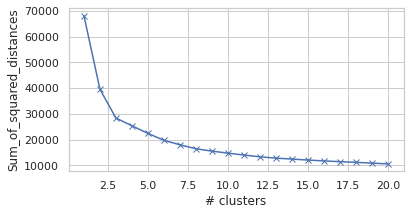

In [ ]:
import matplotlib.pyplot as plt #Elbow method
plt.figure(figsize=(6,3))
plt.plot(list(range(1,21)),Sum_of_squared_distances,'bx-')
plt.ylabel('Sum_of_squared_distances')
plt.xlabel('# clusters')
plt.show()
#5 looks to be an appropriate number 

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5)
model = model.fit(features)

# Clustering

In [64]:
predictions=model.predict(features) #make predictions

In [65]:
predictions

array([3, 3, 0, ..., 2, 1, 1], dtype=int32)

In [66]:
df_all['cluster']=predictions

In [67]:
df_all.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,cluster
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928,3
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928,3
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928,0
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928,3
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928,3


## Visualization of the derived clusters

In [68]:
from sklearn import decomposition
pca=decomposition.PCA(n_components=2)

In [69]:
pca_result = pca.fit_transform(features)

In [70]:
df=pd.DataFrame(pca_result)

In [71]:
df['cluster']=predictions

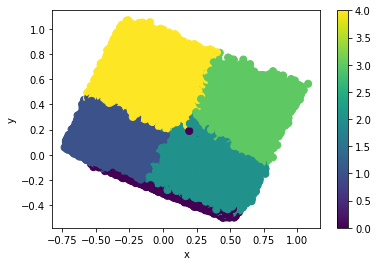

In [86]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)

scatter = ax.scatter(df.iloc[:,0].values, df.iloc[:,1].values,c=predictions,s=50)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(scatter)

fig.show()

# Selecting a classifier
Let's determine the best model to use for future classification. It can be used to classify recommended songs by Spoitfy or to classify already saved songs.



In [ ]:
df_classify=df_all[["acousticness", "danceability", "liveness","energy", "instrumentalness", "loudness", "speechiness","cluster"]]#selecting features

In [ ]:
X=df_classify.iloc[:,:-1].values
Y=df_classify.iloc[:,-1].values

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.2)

In [ ]:
X_train[:,5]=scaler.fit_transform(X_train[:,5].reshape(-1, 1)).reshape(-1,)
X_test[:,5]=scaler.transform(X_test[:,5].reshape(-1, 1)).reshape(-1,)

## Selecting a classifier
There are four models compared in terms of accuracy, which are KNeighborsClassifier,RandomForestClassifier, Support Vector Classifier and Naive Bayes. Support Vector Classifier tourned out to be the best model in terms of accuracy, which made up roughly 0.998, hence we will be using it for future classification.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
acc=[]
for i in range(2,10):
  classifier = KNeighborsClassifier(n_neighbors = i, metric = 'minkowski', p = 2)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  acc.append(accuracy_score(y_test, y_pred))
  print(f'{i}:{acc[-1]}')

2:0.9846977811782709
3:0.9884644811959272
4:0.9885527632275911
5:0.9902595491730917
6:0.9895238655758931
7:0.9905243952680831
8:0.9907598140191867
9:0.991083514801954


In [ ]:
from sklearn.ensemble import RandomForestClassifier
acc=[]
for i in range(5,14):
  classifier = RandomForestClassifier(n_estimators = i, criterion = 'entropy', random_state = 0)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  acc.append(accuracy_score(y_test, y_pred))
  print(f'{i}:{acc[-1]}')


5:0.9929668648107822
6:0.9928785827791183
7:0.9938202577835324
8:0.9938791124713083
9:0.9941145312224119
10:0.9940851038785239
11:0.9943205226296274
12:0.9940851038785239
13:0.9945853687246189


In [ ]:
from sklearn.naive_bayes import GaussianNB
acc=[]

classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
acc.append(accuracy_score(y_test, y_pred))
print(f'{i}:{acc[-1]}')

9:0.959831675592961


In [ ]:
from sklearn.svm import SVC
acc=[]
for i in ['linear', 'poly', 'rbf', 'sigmoid']:
  classifier = SVC(kernel = i, random_state = 0)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  acc.append(accuracy_score(y_test, y_pred))
  print(f'{i}:{acc[-1]}')

linear:0.9982343593667236
poly:0.9989111882761462
rbf:0.998028367959508
sigmoid:0.753428285562945


In [ ]:
classifier = SVC(kernel ='poly', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  904     1     1     1     0]
 [    1 14998     2     0     0]
 [    0     5 11797     5     1]
 [    1     0     5  4639     4]
 [    0     7     0     3  1607]]


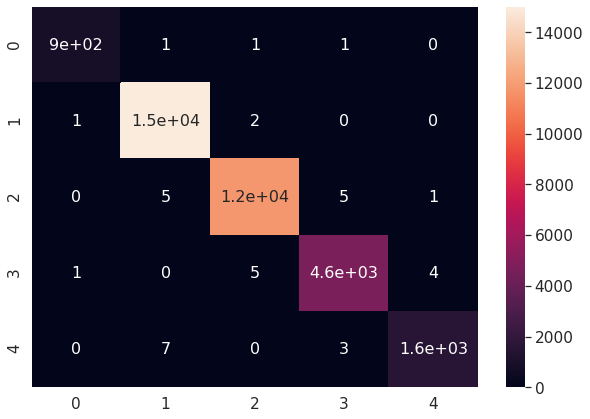

In [ ]:
df_cm = pd.DataFrame(cm, range(5), range(5))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.show()

## Clusters' description
Cluster 0 is tourned out to be very high in terms of speechiness since the mean value over all songs is 0.87. If the speechiness of a song is above 0.66, it is probably made of spoken words, a score between 0.33 and 0.66 is a song that may contain both music and words, and a score below 0.33 means the song does not have any speech. Moreover, it is low in instrumentalness but pretty high in danceability. I assume there are mostly rap songs.
Cluster 1 is relatively high in danceability and energy but low in instrumentalness. I expect to see a lot of energetic songs there.
Cluster 2 is very high in acousticness but low in instrumentalness and loudness. Moreover, it has quite high danceability magnitude. Therefore, I expect to see more calm, perhaps sad, songs. 
Cluster 3 is the highest in acousticness and instrumentalness but the lowest in speechiness.
Cluster 4 is quite high in instrumentalness and energy and average in danceability.

In [ ]:
df=df_all[["id","acousticness", "danceability", "liveness","energy", "instrumentalness", "loudness", "speechiness","cluster"]]

In [ ]:
cluster_info=[]
for i in range(5):
    cluster_info.append(df[df['cluster']==i].describe().iloc[1,:])

In [ ]:
cluster_info

[acousticness         0.492072
 danceability         0.670050
 liveness             0.334549
 energy               0.267797
 instrumentalness     0.004775
 loudness           -18.154219
 speechiness          0.873131
 cluster              0.000000
 Name: mean, dtype: float64, acousticness        0.150852
 danceability        0.592988
 liveness            0.207617
 energy              0.694864
 instrumentalness    0.015803
 loudness           -7.850433
 speechiness         0.085111
 cluster             1.000000
 Name: mean, dtype: float64, acousticness         0.800405
 danceability         0.511200
 liveness             0.203982
 energy               0.322321
 instrumentalness     0.030855
 loudness           -12.906170
 speechiness          0.064676
 cluster              2.000000
 Name: mean, dtype: float64, acousticness         0.929996
 danceability         0.418107
 liveness             0.178563
 energy               0.223253
 instrumentalness     0.815071
 loudness           -17.9

# Predicting my saved songs on Spotify

In [10]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util

In [11]:
cid ='' # Client ID; copy this from your app 
secret = '' # Client Secret; copy this from your app
username = '' # Your Spotify username

#for avaliable scopes see https://developer.spotify.com/web-api/using-scopes/
scope = 'user-library-read playlist-modify-public playlist-read-private user-top-read playlist-modify-private user-read-currently-playing'
redirect_uri='
client_credentials_manager = spotipy.oauth2.SpotifyOAuth(scope=scope, username=username,client_id=cid, client_secret=secret, redirect_uri=redirect_uri, cache_path='./tokens.txt') #SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


In [12]:
offset = 0
songs = []
names = []
ids = []
while True:
    content = sp.current_user_saved_tracks(limit=50, offset=offset)
    songs += content['items']
    if content['next'] is not None:
        offset += 100
    else:
        break
for i in songs:
    names.append(i['track']['name'])
    ids.append(i['track']['id'])
index=0
audio_features=[]
while index < len(ids):
    audio_features += sp.audio_features(ids[index:index + 50])
    index += 50
features_list = []
for features in audio_features:
    features_list.append([features['acousticness'], features['danceability'],
                          features['liveness'],features['energy'],
                          features['instrumentalness'], features['loudness'],
                          features['speechiness']])

mydf = pd.DataFrame(features_list, columns=["acousticness", "danceability", "liveness","energy", "instrumentalness", "loudness", "speechiness"],index=ids)


In [ ]:
mydf.head()

,acousticness,danceability,liveness,energy,instrumentalness,loudness,speechiness
2bdCO4UTMX1ennK2I4rFpD,0.35600,0.690,0.3080,0.452,0.00000,-8.026,0.0472
2aPfFIwN3pZPRmCXMwFUqw,0.00462,0.557,0.2930,0.630,0.00000,-5.558,0.0348
7eLyNFj78bYlgVvamPPZ9p,0.69100,0.720,0.3800,0.611,0.00077,-9.869,0.1330
1tD8J13a74q8fBqXwAP50j,0.59500,0.766,0.3810,0.354,0.00000,-9.486,0.0543
3KkVd7Xg0jCAZSOatzQ6Td,0.74400,0.716,0.0929,0.388,0.00000,-8.433,0.0348


## Preprocessing

In [ ]:
loudness=mydf['loudness'].values
loudness_scaled=scaler.fit_transform(loudness.reshape(-1,1))
mydf['loudness']=loudness_scaled

In [ ]:
features=mydf.values

## Classification

In [ ]:
predictions=classifier.predict(features)

In [ ]:
mydf['cluster']=predictions

In [ ]:
mydf.head()

,acousticness,danceability,liveness,energy,instrumentalness,loudness,speechiness,cluster
Unnamed: 0.1,,,,,,,,
2bdCO4UTMX1ennK2I4rFpD,0.35600,0.690,0.3080,0.452,0.00000,0.671378,0.0472,1
2aPfFIwN3pZPRmCXMwFUqw,0.00462,0.557,0.2930,0.630,0.00000,0.790020,0.0348,1
7eLyNFj78bYlgVvamPPZ9p,0.69100,0.720,0.3800,0.611,0.00077,0.582781,0.1330,2
1tD8J13a74q8fBqXwAP50j,0.59500,0.766,0.3810,0.354,0.00000,0.601192,0.0543,2
3KkVd7Xg0jCAZSOatzQ6Td,0.74400,0.716,0.0929,0.388,0.00000,0.651812,0.0348,2


## Sorting my saved songs into separate playlists
I am going to sort my saved songs by the derived clusters

In [ ]:
moods=['rap','energetic/dancing','calm/romantic','studying/thinking','chill'] #I listened to the songs and generalized them by naming the clusters. 

In [ ]:
clustered_songs=list(zip(mydf.index,mydf.iloc[:,-1]))

In [ ]:
sorted_songs=[[],[],[],[],[]]
for i in range(len(clustered_songs)):
    sorted_songs[clustered_songs[i][1]].append(clustered_songs[i][0])

In [ ]:
playlists=[]
for i in range(5):
    playlist_created=sp.user_playlist_create(username, name="Cluster "+str(i), public=False,description='')#create playlists for a corresponding cluster
    sp.user_playlist_add_tracks(username,playlist_created['id'],sorted_songs[i][:100]) #add new songs
    playlists.append(playlist_created)

In [ ]:
len_clusters=[]
for i in range(5):
    len_clusters.append(len(mydf[mydf['cluster']==i].values))

## Description of my saved songs
I concluded that the vast majority of my saved songs are energetic meaning that they are high in danceability and energy. I also like calm/romantic songs from time to time.

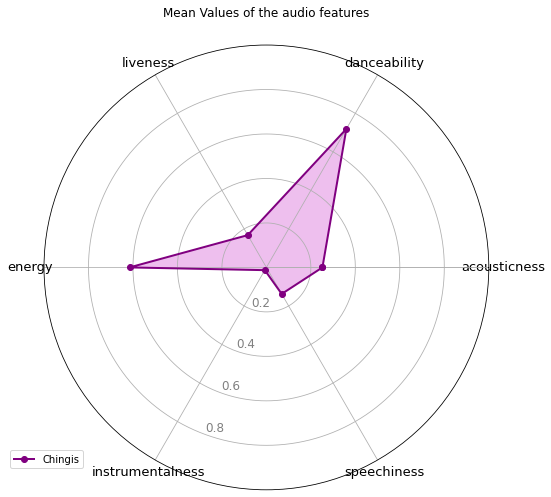

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
labels= ["acousticness", "danceability", "liveness","energy", "instrumentalness", "speechiness"]
stats= mydf[ ["acousticness", "danceability", "liveness","energy", "instrumentalness", "speechiness"]].mean().tolist()

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

#Size of the figure
fig=plt.figure(figsize = (18,18))

ax = fig.add_subplot(221, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2, label = "Chingis", color= 'purple')
ax.fill(angles, stats, alpha=0.25, facecolor='m')
ax.set_thetagrids(angles * 180/np.pi, labels , fontsize = 13)


ax.set_rlabel_position(250)
plt.yticks([0.2 , 0.4 , 0.6 , 0.8  ], ["0.2",'0.4', "0.6", "0.8"], color="grey", size=12)
plt.ylim(0,1)

ax.set_title('Mean Values of the audio features')
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

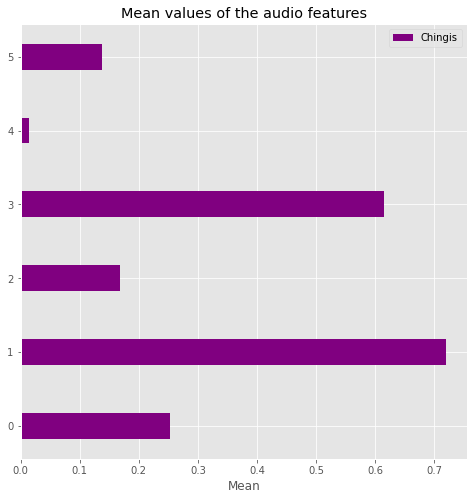

In [24]:
from matplotlib import style
# Number of features
N = len(mydf[ ["acousticness", "danceability", "liveness","energy", "instrumentalness", "speechiness"]].mean())
# Array with the number of features
ind = np.arange(N) 

width = 0.35  
#Bar plot with my list
plt.barh(ind, mydf[ ["acousticness", "danceability", "liveness","energy", "instrumentalness", "speechiness"]].mean() , width, label='Chingis', color = 'purple')


#X- label
plt.xlabel('Mean', fontsize = 12)
# Title
plt.title('Mean values of the audio features')

#legend
plt.legend(loc='best')
# Figure size
plt.rcParams['figure.figsize'] =(8,8)
# Set style
style.use("ggplot")

plt.show()

In [ ]:
print('my saved songs:')
pers=[]
for i in range(5):
    pers.append(float(len_clusters[i]/sum(len_clusters)))
    print(moods[i],float(len_clusters[i]/sum(len_clusters)))

my saved songs:
rap 0.006666666666666667
energetic/dancing 0.8
calm/romantic 0.18444444444444444
studying/thinking 0.006666666666666667
chill 0.0022222222222222222


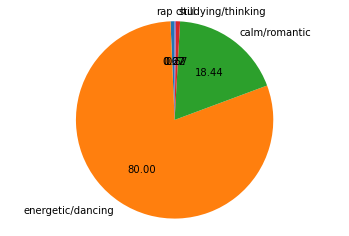

In [ ]:
# import the pyplot library

import matplotlib.pyplot as plotter



 

figureObject, axesObject = plotter.subplots()

 

# Draw the pie chart

axesObject.pie(pers,

        labels=moods,

        autopct='%1.2f',

        startangle=90)

 

# Aspect ratio - equal means pie is a circle

axesObject.axis('equal')

 

plotter.show()

# Adding new recommened songs into our cluster playlists

In [ ]:
mydf.index

Index(['7K7bl9synB5gWg6OAkcBpf', '4GFpId1SnvPZn8ER4VflPL',
       '4jwP0pxx7su04FYc6J12EQ', '1db6ixe9nX6cqt2V1DYZnW',
       '5pU3LVebfaEf8m2buAfYBH', '4fRLdKddgF9HlNqOqLAUWl',
       '1SWg0LGSxwbD3pyLfW0z5H', '5BqUbKq9rCMrCkRtAiz8XA',
       '3Dv1eDb0MEgF93GpLXlucZ', '4PMLEEYw4mblYsPlDSHKyu',
       ...
       '37vg1lxQrG6D1jBTaFXRCQ', '5icLWG7MsuPERX5TucJtRr',
       '4048HzIyYNMwfCMRsUW0HZ', '0I3q5fE6wg7LIfHGngUTnV',
       '6Gy7rXB6Ku5vIWC7WGWsl3', '79OEIr4J4FHV0O3KrhaXRb',
       '6bP5IB7UNNJMpGvMGO28qK', '3808TY2N8RQG8OcRCHoZvD',
       '1faIb3PPSzEifCHUOJ691R', '2j7mcsEz4n5XxMMqqjjB6p'],
      dtype='object', length=450)

In [ ]:
rec_tracks = []
for i in mydf.index.tolist():
    rec_tracks += sp.recommendations(seed_tracks=[i], limit=5)['tracks'] #get recommendations from Spotify

rec_track_ids = []
rec_track_names = []
for i in rec_tracks:
    rec_track_ids.append(i['id']) #extract id and name of songs
    rec_track_names.append(i['name'])

rec_features = []
for i in range(0,len(rec_track_ids)):
    rec_audio_features = sp.audio_features(rec_track_ids[i]) #extract features
    for track in rec_audio_features:
        rec_features.append(track)
        
rec_playlist_df = pd.DataFrame(rec_features, index = rec_track_ids) #make a dataframe 

In [ ]:
rec_playlist_df.head()

,acousticness,danceability,liveness,energy,instrumentalness,loudness,speechiness
7L5lSrY4QYAwvaqeIXSayN,0.382,0.403,0.1480,0.356,0.00000,0.697715,0.0298
43ssW9UUnfn0llEYn8wZXq,0.636,0.494,0.1060,0.433,0.00000,0.641972,0.3840
22AJMMJMaQ3qtTwlegrKcm,0.811,0.492,0.1360,0.378,0.00000,0.717093,0.0304
7FjKU2mfpEpvKIbx8naZRk,0.723,0.471,0.0964,0.474,0.00000,0.751431,0.0382
5zT5cMnMKoyruPj13TQXGx,0.862,0.389,0.1040,0.302,0.00567,0.475193,0.0438


## Preprocessing

In [ ]:
loudness=rec_playlist_df['loudness'].values
loudness_scaled=scaler.fit_transform(loudness.reshape(-1,1))
rec_playlist_df['loudness']=loudness_scaled

In [ ]:
X=rec_playlist_df[["acousticness", "danceability", "liveness","energy", "instrumentalness", "loudness", "speechiness"]].values

## Classification

In [ ]:
clusters=classifier.predict(X)

In [ ]:
rec_playlist_df['cluster']=df.iloc[:,-1].values

In [ ]:
rec_playlist_df

,acousticness,danceability,liveness,energy,instrumentalness,loudness,speechiness,cluster
7L5lSrY4QYAwvaqeIXSayN,0.3820,0.403,0.1480,0.356,0.00000,0.697715,0.0298,2
43ssW9UUnfn0llEYn8wZXq,0.6360,0.494,0.1060,0.433,0.00000,0.641972,0.3840,2
22AJMMJMaQ3qtTwlegrKcm,0.8110,0.492,0.1360,0.378,0.00000,0.717093,0.0304,2
7FjKU2mfpEpvKIbx8naZRk,0.7230,0.471,0.0964,0.474,0.00000,0.751431,0.0382,2
5zT5cMnMKoyruPj13TQXGx,0.8620,0.389,0.1040,0.302,0.00567,0.475193,0.0438,2
...,...,...,...,...,...,...,...,...
73Ijn0pKw1YJVP4OO4jUl7,0.1290,0.745,0.0811,0.525,0.00000,0.698391,0.2390,1
48PGeEeCqI5QZlUS9x4X6u,0.0672,0.730,0.3530,0.746,0.00000,0.878735,0.0517,1
1Jm1I3APcmVz3MqPr5vfTx,0.2010,0.681,0.1840,0.529,0.00000,0.681943,0.0341,1
3Osd3Yf8K73aj4ySn6LrvK,0.2460,0.654,0.1670,0.750,0.01780,0.699428,0.1050,1


## Updating our playlists by adding the classified songs

In [ ]:
clustered_songs=list(zip(rec_playlist_df.index,rec_playlist_df.iloc[:,-1]))
sorted_songs=[[],[],[],[],[]]
for i in range(len(clustered_songs)):
    sorted_songs[clustered_songs[i][1]].append(clustered_songs[i][0])

In [ ]:
for i in range(5):
    sp.user_playlist_add_tracks(username,playlists[i]['id'],sorted_songs[i][:100]) #add new songs

In [ ]:
rec_playlist_df['cluster'].value_counts() #Surprisingly, Spotify mostly suggested  energetic/dance songs

1    1796
2     364
4      25
0      19
3      16
Name: cluster, dtype: int64